# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**Important**: This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results.

## Overview of the Dandiset

This Dandiset (**DANDI:001375/0.250406.1855**) is titled "Septum GABA disruption with DREADDs". It is a pilot study investigating the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.

You can find the Dandiset here: https://dandiarchive.org/dandiset/001375/0.250406.1855

## What this notebook covers

This notebook will demonstrate how to:
- Load the Dandiset using the DANDI API.
- Load an NWB file from the Dandiset.
- Examine the structure and contents of the NWB file.
- Visualize a subset of the raw electrophysiology data.
- Examine and visualize the sorted unit (spike) data.

## Required Packages

This notebook requires the following packages:
- dandi
- pynwb
- h5py
- remfile
- numpy
- matplotlib
- pandas

## Loading the Dandiset

We can load the Dandiset using the `DandiAPIClient`.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "0.250406.1855")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16)


## Loading an NWB file

We will load the NWB file located at `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`.

The URL for this asset is: `https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`

We can use `pynwb`, `h5py`, and `remfile` to stream data directly from the Dandi Archive.

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file identifier: MS13B
Session description: mouse running laps in virtual hallway
Session start time: 2024-07-25 19:00:00-07:00


## Contents of the NWB file

This NWB file contains extracellular electrophysiology data, along with trial information and sorted units.

Here is a summary of some key contents:

*   **acquisition**: Raw electrophysiology data
    *   `timestamps`: Not a dataset, timestamps can be reconstructed from `starting_time` and `rate`.
    *   `rate`: Sampling rate (e.g., 30000.0 Hz)
    *   `data`: The raw voltage traces (shape: number of time points x number of channels)
*   **intervals**: Time intervals for experimental paradigms
    *   `trials`: Table containing start and stop times for trials.
*   **electrodes**: Table with information about each electrode.
    *   Columns include `x`, `y` coordinates, `location`, `filtering`, `group`, `group_name`, and `label`.
*   **units**: Table containing information about sorted units (neurons).
    *   Columns include `spike_times`.

You can explore this NWB file interactively on Neurosift:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=0.250406.1855

## Examining Trial Intervals and Electrodes

We can load the trial information and electrode details into pandas DataFrames for easier inspection.

In [3]:
import pandas as pd

# Load trials data
trials_df = nwb.trials.to_dataframe()
print("Trials DataFrame Head:")
print(trials_df.head())

# Load electrodes data
electrodes_df = nwb.electrodes.to_dataframe()
print("\nElectrodes DataFrame Head:")
print(electrodes_df.head())

Trials DataFrame Head:
    start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467

Electrodes DataFrame Head:
       x       y location        filtering  \
id                                           
0   20.0  1375.0  unknown  0.1 - 7500.0 Hz   
1   20.0  1325.0  unknown  0.1 - 7500.0 Hz   
2   20.0  1275.0  unknown  0.1 - 7500.0 Hz   
3   20.0  1225.0  unknown  0.1 - 7500.0 Hz   
4   20.0  1175.0  unknown  0.1 - 7500.0 Hz   

                                                group group_name  \
id                                                                 
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x12637...     shank1   
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x12637...     shank1   
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x12637...     shank1   
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x12637...     shank1   
4   shank1 pynwb.ecephys.ElectrodeGr

The `trials` DataFrame shows the start and stop times for different trials. The `electrodes` DataFrame provides spatial and grouping information for each of the recording channels.

## Visualizing a subset of Raw Electrophysiology Data

The raw electrophysiology data is quite large, so we will load and visualize a small subset of the data to see the voltage traces.

We will plot the first 4 channels for a 0.1 second interval starting at 10 seconds.

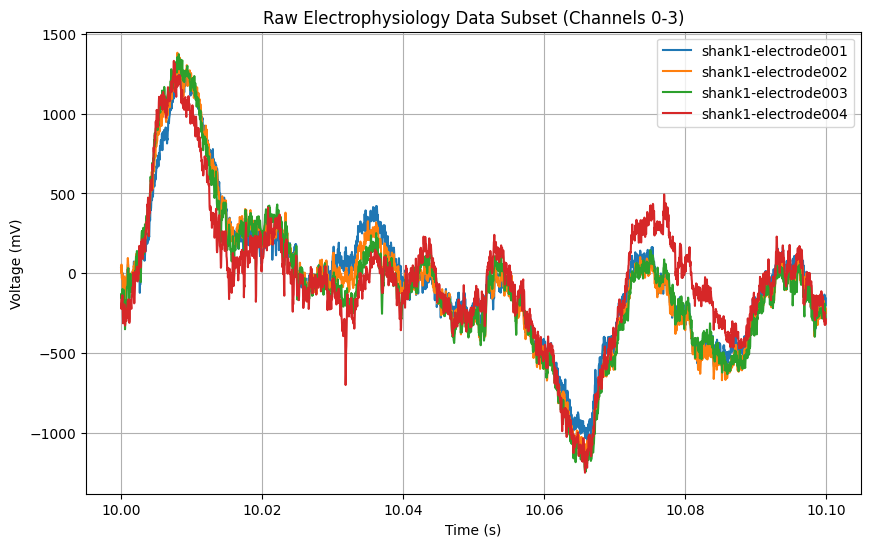

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Access the electrophysiology data and properties
ecephys_data = nwb.acquisition['time_series'].data
sampling_rate = nwb.acquisition['time_series'].rate
starting_time = nwb.acquisition['time_series'].starting_time

# Select a time window (10 seconds to 10.1 seconds)
start_time = 10.0
end_time = 10.1
start_index = int(start_time * sampling_rate)
end_index = int(end_time * sampling_rate)

# Select a few channels (first 4)
channel_indices = [0, 1, 2, 3]

# Load the data subset
ecephys_subset = ecephys_data[start_index:end_index, channel_indices]

# Generate timestamps for the subset
timestamps_data = starting_time + np.arange(start_index, end_index) / sampling_rate

# Plot the data
plt.figure(figsize=(10, 6))
for i, channel_index in enumerate(channel_indices):
    # Get the actual electrode label for the legend
    electrode_label = electrodes_df.iloc[channel_index]['label']
    plt.plot(timestamps_data, ecephys_subset[:, i], label=f'{electrode_label}')

plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.title("Raw Electrophysiology Data Subset (Channels 0-3)")
plt.legend()
plt.grid(True)
plt.show()

This plot shows the raw voltage fluctuations recorded from a few channels over a short period. This can be useful for assessing the signal quality.

## Examining and Visualizing Units Data

The `units` table contains the timestamps of detected spikes for each sorted unit. We can examine the distribution of spike counts across units.

Units DataFrame Head:
                                          spike_times
id                                                   
1   [3.5485, 3.5543666666666667, 3.784666666666667...
2   [0.1826, 0.21976666666666667, 0.77823333333333...
3   [0.005533333333333334, 0.01633333333333333, 0....
4   [0.5452333333333333, 0.5632, 0.572833333333333...
5   [0.07036666666666666, 0.1002, 0.17066666666666...


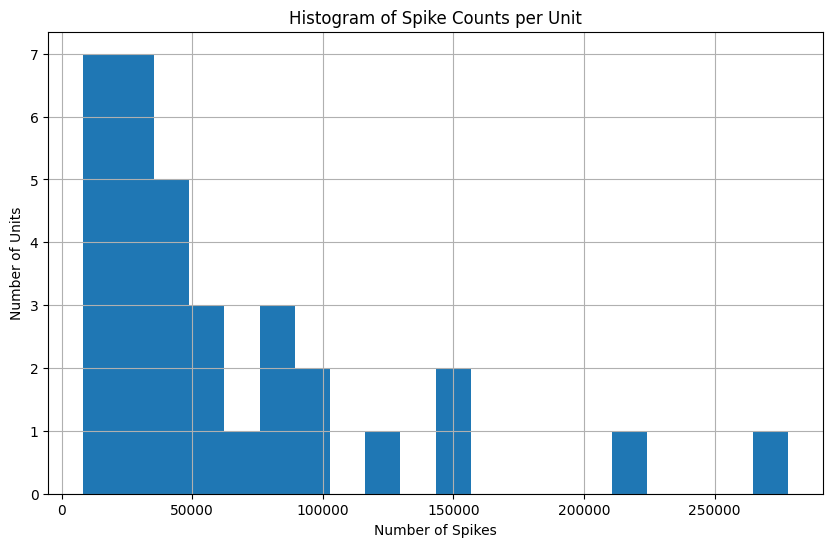

In [5]:
# Load units data
units_df = nwb.units.to_dataframe()
print("Units DataFrame Head:")
print(units_df.head())

# Calculate spike counts per unit
spike_counts = units_df['spike_times'].apply(len)

# Plot histogram of spike counts
plt.figure(figsize=(10, 6))
plt.hist(spike_counts, bins=20)
plt.xlabel("Number of Spikes")
plt.ylabel("Number of Units")
plt.title("Histogram of Spike Counts per Unit")
plt.grid(True)
plt.show()

The histogram shows the distribution of the total number of spikes recorded for each sorted unit. We can see that some units are much more active than others.

## Summary and Future Directions

This notebook demonstrated how to access and explore several key data types within this Dandiset's NWB file, including raw electrophysiology, trial intervals, electrode information, and sorted units. We visualized a small subset of the raw data and examined the distribution of spike counts.

Possible future directions for analysis could include:
- Analyzing the relationship between neural activity (raw data or spike times) and the defined trials.
- Investigating the spatial distribution of units and their activity patterns based on electrode locations.
- Performing more advanced analyses on the spike times, such as inter-spike intervals or cross-correlations between units.
- Exploring other potential data streams or metadata within the NWB file that were not covered here.

In [6]:
io.close()